In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plot
from matplotlib.patches import Circle

In [2]:
# file = "/hpc/group/vossenlab/rck32/eic/work_eic/macros/Timing_estimation/data/df/old_400events_high_thresh.csv"
file = "/hpc/group/vossenlab/rck32/eic/work_eic/macros/Timing_estimation/data/df/old_200events.csv"
file_old = "/hpc/group/vossenlab/rck32/eic/work_eic/macros/Timing_estimation/data/df/old_50events_cluster.csv"

df = pd.read_csv(file)
df_old = pd.read_csv(file_old)

### Processing

In [23]:
def process_df(df, cone_angle_deg=45, max_events=None, figsize=(15, 15)):
    modified_df = df.copy()
    event_references = modified_df.groupby('event_idx').last()[['first hit x', 'first hit y']]
    modified_df['ModifiedTrueID'] = modified_df['trueID']
    
    for event_id in modified_df['event_idx'].unique():
        event_mask = modified_df['event_idx'] == event_id
        event_data = modified_df[event_mask]
        
        ref_x = event_references.loc[event_id, 'first hit x']
        ref_y = event_references.loc[event_id, 'first hit y']
        reference_angle = np.degrees(np.arctan2(ref_x, ref_y))
        hit_angles = np.degrees(np.arctan2(event_data['strip_x']*10, event_data['strip_y']*10))
        # Get the angular distance from the reference direction
        angles = np.abs(hit_angles - reference_angle)
        # Handle the wraparound at ±180 degrees
        angles = np.minimum(angles, 360 - angles)
        
        # Modify TrueID for points outside cone
        modified_df.loc[event_mask & (angles > cone_angle_deg), 'ModifiedTrueID'] = -1
    return modified_df

# Plot the data
modified_df = process_df(df_old, cone_angle_deg = 22)

In [25]:
modified_df

,Unnamed: 0,event_idx,stave_idx,layer_idx,segment_idx,trueID,original_trueID,truePID,hitID,hitPID,...,KMU_endpoint_y,KMU_endpoint_z,Charge1,Time1,Charge2,Time2,first hit time,first hit x,first hit y,ModifiedTrueID
0,0,6,7,7,25,0,16.0,22.0,18.0,-11.0,...,232.610275,1999.665405,149.306900,2.858858,2.324310,2.851935,2.858858,235.065002,-18.217684,0
1,1,6,7,7,26,0,16.0,22.0,20.0,22.0,...,232.610275,1999.665405,2.273515,2.875010,0.000000,0.000000,2.858858,235.065002,-18.217684,0
2,2,6,7,7,24,0,16.0,22.0,19.0,22.0,...,232.610275,1999.665405,0.723985,2.881197,0.000000,0.000000,2.858858,235.065002,-18.217684,0
3,3,14,0,0,14,1,10.0,22.0,12.0,-11.0,...,-581.933655,-141.394989,11.231546,2.174749,5.069574,2.171097,2.174749,107.711281,-148.791702,1
4,4,14,0,0,15,1,10.0,22.0,42.0,11.0,...,-581.933655,-141.394989,0.216002,2.211912,0.088938,2.255710,2.174749,107.711281,-148.791702,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,47,6,1,45,9,5.0,22.0,142.0,11.0,...,-196.692413,1178.797119,0.431695,3.344897,0.101581,3.315325,3.281362,86.149170,170.353821,9
252,252,47,6,2,50,9,5.0,22.0,60.0,11.0,...,-196.692413,1178.797119,0.558630,3.390408,0.177768,3.344102,3.281362,86.149170,170.353821,9
253,253,47,6,2,49,9,5.0,22.0,82.0,11.0,...,-196.692413,1178.797119,0.939413,3.345099,0.266624,3.370624,3.281362,86.149170,170.353821,9
254,254,47,6,2,51,9,5.0,22.0,87.0,11.0,...,-196.692413,1178.797119,4.468827,3.421584,1.536084,3.393790,3.281362,86.149170,170.353821,9


### Plotting

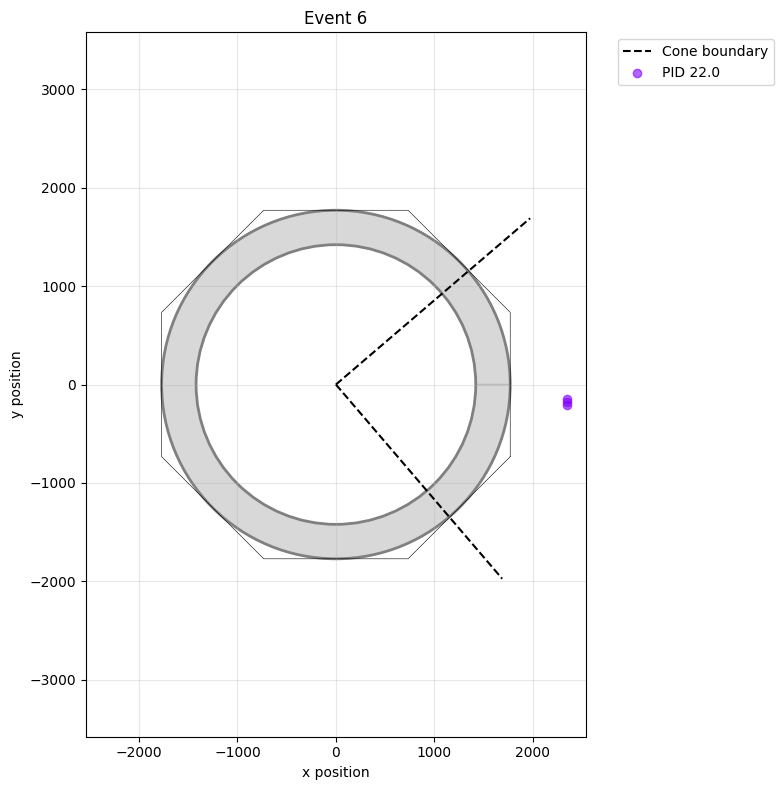

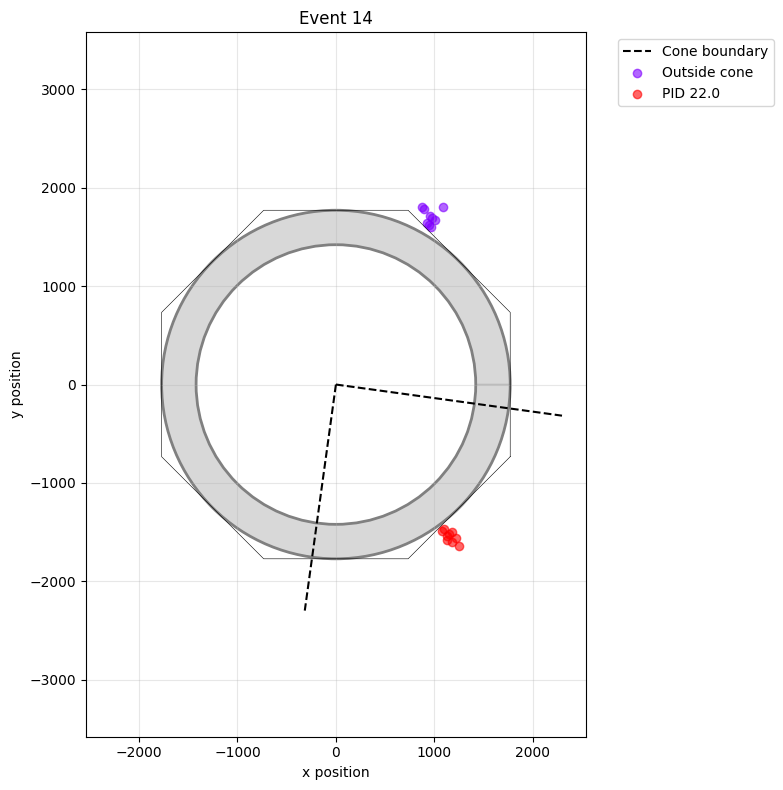

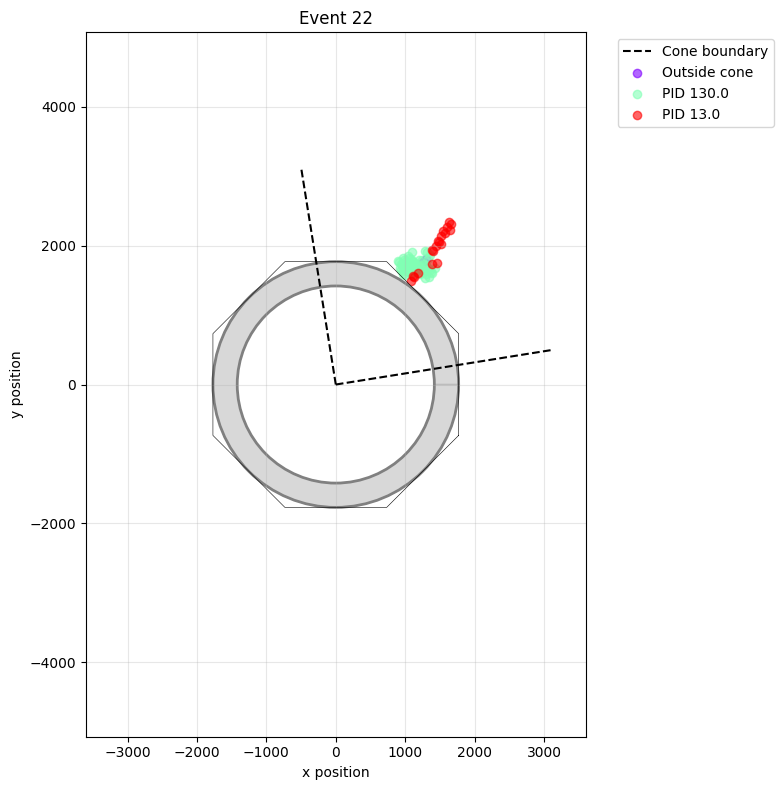

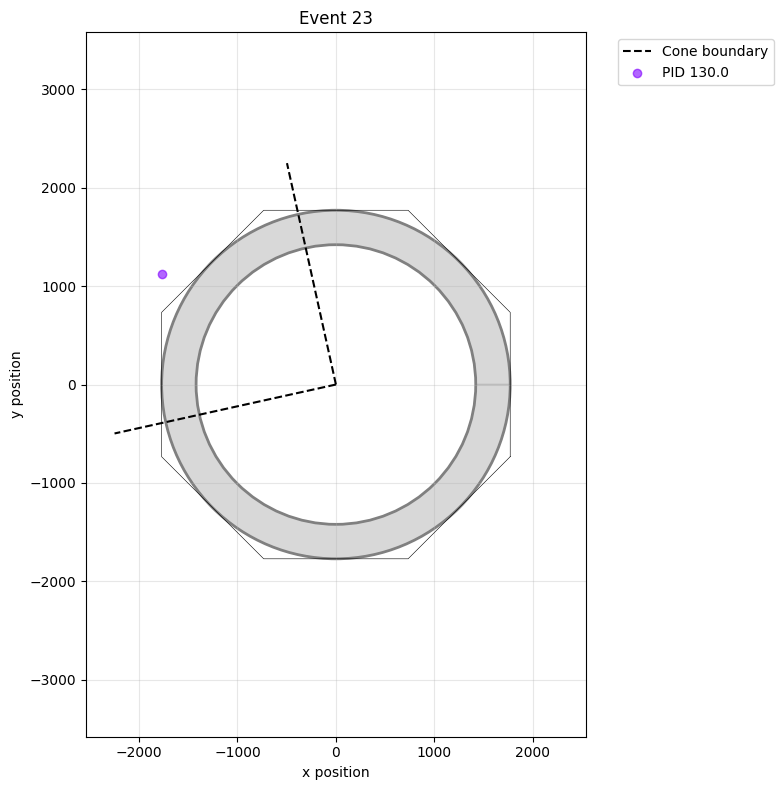

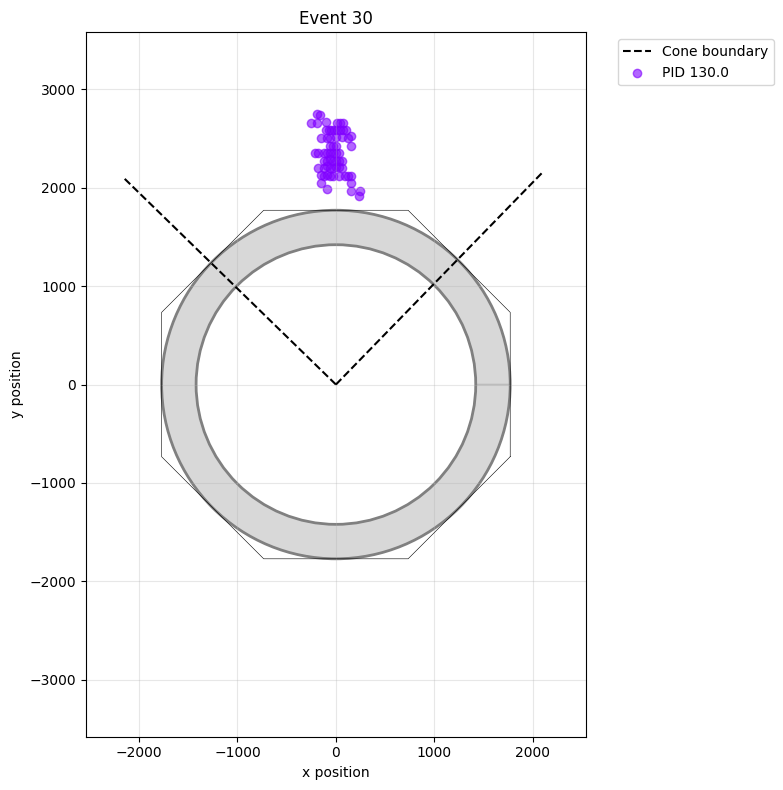

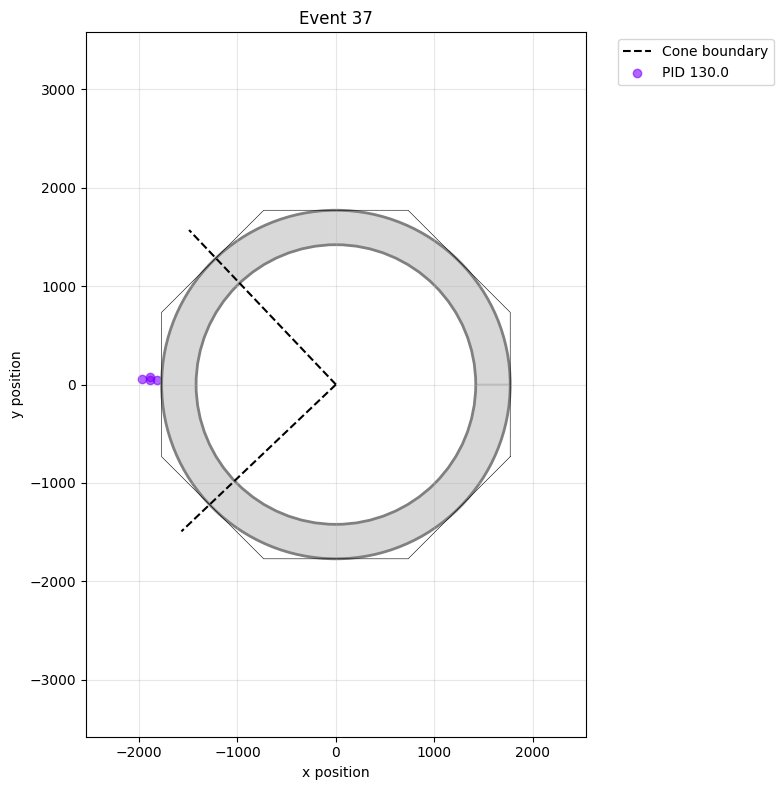

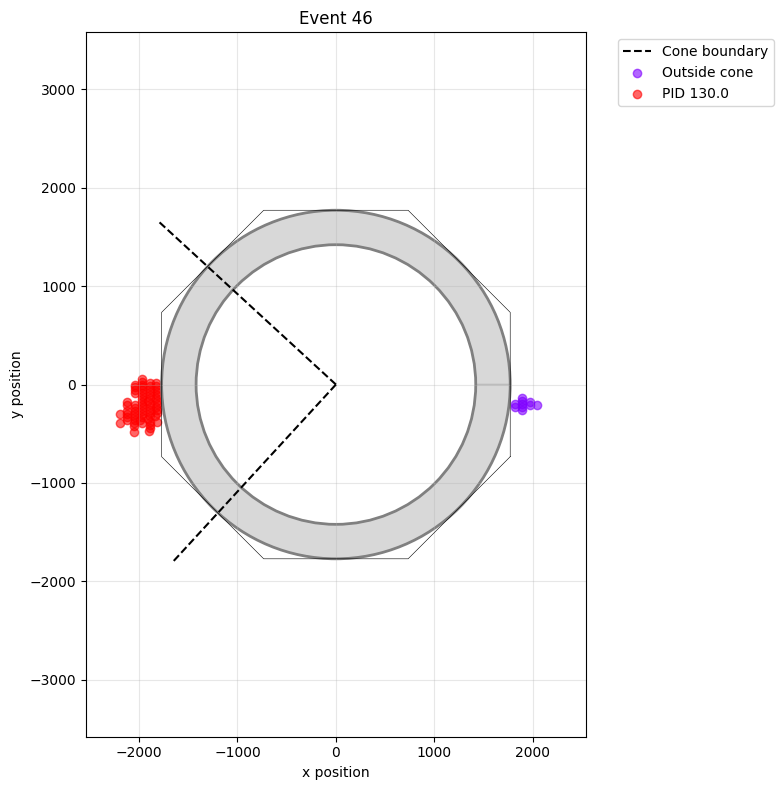

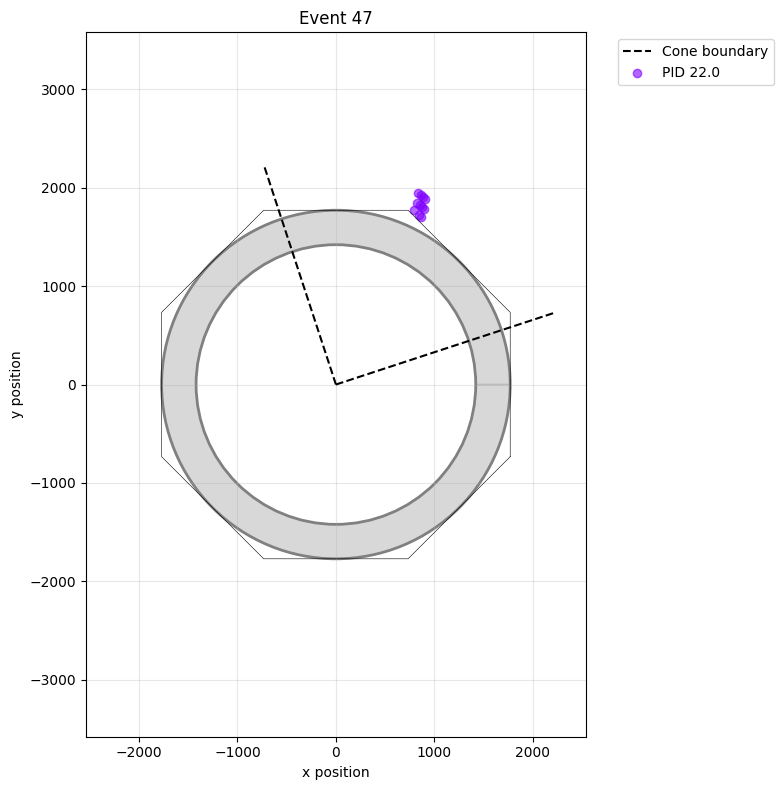

In [20]:
import pandas as pd

def plot_hits_by_event(df, cone_angle_deg=45, max_events=None, figsize=(15, 15)):
    """
    Create separate plots for each event showing hits colored by TrueID and cone filter.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing 'x', 'y', 'TrueID', and 'event_idx' columns
    cone_angle_deg : float
        Half-angle of the cone in degrees (default: 45)
    max_events : int, optional
        Maximum number of events to plot. If None, plot all events.
    figsize : tuple
        Figure size for the entire subplot grid (default: (15, 15))
    """
    unique_events = sorted(df['event_idx'].unique())
    if max_events is not None:
        unique_events = unique_events[:max_events]
    n_events = len(unique_events)
    event_references = df.groupby('event_idx').last()[['first hit x', 'first hit y']]
    
    for idx, event_id in enumerate(unique_events):
        # Get data for this event
        event_data = df[df['event_idx'] == event_id].copy()
        
        plot.figure(figsize=(8, 8))
        ref_x = event_references.loc[event_id, 'first hit x']
        ref_y = event_references.loc[event_id, 'first hit y']
        reference_angle = np.degrees(np.arctan2(ref_x, ref_y))
        hit_angles = np.degrees(np.arctan2(event_data['strip_x']*10, event_data['strip_y']*10))
        # Get the angular distance from the reference direction
        angles = np.abs(hit_angles - reference_angle)
        # Handle the wraparound at ±180 degrees
        angles = np.minimum(angles, 360 - angles)

        # For the cone boundaries, rotate the lines to the reference direction
        angle_rad = np.radians(cone_angle_deg)
        ref_angle_rad = np.radians(reference_angle)

        max_radius = max(np.sqrt((event_data['strip_x'] * 10)**2 + (event_data['strip_y'] * 10)**2)) * 1.1
        # Create rotated cone boundaries more precisely
        theta_left = ref_angle_rad - angle_rad
        theta_right = ref_angle_rad + angle_rad

        # Draw lines from origin
        x_left = max_radius * np.sin(theta_left)
        y_left = max_radius * np.cos(theta_left)
        x_right = max_radius * np.sin(theta_right)
        y_right = max_radius * np.cos(theta_right)

        # Plot the two straight lines from origin
        plot.plot([0, x_left], [0, y_left], 'k--', label='Cone boundary')
        plot.plot([0, x_right], [0, y_right], 'k--')
        
        # Modify TrueID for points outside cone
        event_data['ModifiedTrueID'] = event_data['trueID']
        event_data.loc[angles > cone_angle_deg, 'ModifiedTrueID'] = -1
        
        # Get unique ModifiedTrueIDs for color mapping
        unique_ids = sorted(event_data['ModifiedTrueID'].unique())
        colors = plot.cm.rainbow(np.linspace(0, 1, len(unique_ids)))
        
        # Plot points for each TrueID
        for id_val, color in zip(unique_ids, colors):
            mask = event_data['ModifiedTrueID'] == id_val
            # Get the corresponding true_PID value, or -1 if outside cone
            pid_val = -1 if id_val == -1 else event_data.loc[mask, 'truePID'].iloc[0]
            label = f'PID {pid_val}' if id_val != -1 else 'Outside cone'
            plot.scatter(event_data.loc[mask, 'strip_x'] * 10,
                        event_data.loc[mask, 'strip_y'] * 10,
                        c=[color],
                        label=label,
                        alpha=0.6)
        
        # Set labels and title
        plot.xlabel('x position')
        plot.ylabel('y position')
        plot.title(f'Event {event_id}')
        plot.grid(True, alpha=0.3)
        plot.axis('equal')

        plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
        R = (1420 + 350)
        R_min = (1420)
        color = "black"
        outer_radius = R / np.cos(np.pi/8)
        angles = np.linspace(-np.pi/8, 2*np.pi-np.pi/8, 9)[:-1] 
        hex_x = outer_radius * np.cos(angles)
        hex_y = outer_radius * np.sin(angles)
        plot.plot(np.append(hex_x,hex_x[0]), np.append(hex_y, hex_y[0]), color=color, linewidth=0.4)

        #circle drawing
        theta = np.linspace(0, 2*np.pi, 100)

        # Create points for the outer and inner circles
        x_outer = R * np.cos(theta)
        y_outer = R * np.sin(theta)
        x_inner = R_min * np.cos(theta)
        y_inner = R_min * np.sin(theta)

        # Combine the points to create a closed path
        x = np.concatenate([x_outer, x_inner[::-1], [x_outer[0]]])
        y = np.concatenate([y_outer, y_inner[::-1], [y_outer[0]]])

        # Fill the region between circles
        plot.fill(x, y, alpha=0.3, color='gray', label='Solenoid')

        circle_out = Circle((0, 0), R, color="gray", fill=False, linewidth=2)
        circle_in = Circle((0, 0), R_min, color="gray", fill=False, linewidth=2)
        plot.gca().add_patch(circle_out)
        plot.gca().add_patch(circle_in)

        plot.xlim(-3600,3600)
        plot.ylim(-3600,3600)
        plot.tight_layout()
        plot.show()

# Example usage:
# Create sample data with event_idx
# np.random.seed(42)
# n_points = 300
# sample_data = pd.DataFrame({
#     'x': np.random.uniform(-10, 10, n_points),
#     'y': np.random.uniform(0, 10, n_points),
#     'TrueID': np.random.randint(0, 3, n_points),
#     'event_idx': np.repeat(range(6), 50)  # 6 events with 50 hits each
# })

data = df_old

# Plot the data
plot_hits_by_event(data)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

import numpy as np
import matplotlib.cm as cm
data = df_old
# Group the data by event_idx for analysis
events = data.groupby("event_idx")

# Create a colormap for trueID values

# Loop through each event and create plots
for event_idx, group in events:
    
    unique_trueIDs = []
    labels = []
    for trueID,truePID in zip(group["trueID"],group["truePID"]):
        if(trueID in unique_trueIDs):
#             trueID_index += 1
            continue
        else:
#             length = group["truePID"].keys()
#             print(f"len {length}, idx: {trueID_index}")
#             truePID = group["truePID"][trueID_index]
            unique_trueIDs.append(trueID)
            labels.append(f"trueID {trueID}, truePID {truePID}")
#             trueID_index += 1
    unique_trueIDs = np.array(unique_trueIDs)
    colors = cm.tab20(np.linspace(0, 1, len(unique_trueIDs)))
    color_map = dict(zip(unique_trueIDs, colors))
    # Prepare data for plotting
    x = group["hit_x"]
    y = group["hit_y"]
    sizes = group["Charge1"] + group["Charge2"]
    trueIDs = group["trueID"]
    phi = np.arctan2(y, x)

    # Assign colors based on trueID
    point_colors = [color_map[tid] for tid in trueIDs]

    # Create the plot
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, s=sizes * 20, c=point_colors, alpha=0.7, label="Data points")
    plt.quiver(x, y, np.cos(phi), np.sin(phi), angles="xy", scale_units="xy", scale=1, color="gray", alpha=0.5)
    endpoints_x = np.array(group["KMU_endpoint_x"])
    endpoints_y = np.array(group["KMU_endpoint_y"])
    plt.scatter(endpoints_x, endpoints_y, color="gold", marker="*", s=200, label="KMU Endpoint")

    # Add legend for trueID colors
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[tid], markersize=10) 
               for tid in unique_trueIDs]
#     labels = [f"trueID {tid[0]}, truePID {tid[1]}" for tid in unique_trueIDs]
    plt.legend(handles, labels, loc="upper right")

    # Add labels and title
    plt.xlabel("hit_x")
    plt.ylabel("hit_y")
    plt.title(f"Event {event_idx} Analysis")
    plt.grid(True)
    
    R = (1420 + 350)
    R_min = (1420)
    color = "black"
    outer_radius = R / np.cos(np.pi/8)
    angles = np.linspace(-np.pi/8, 2*np.pi-np.pi/8, 9)[:-1] 
    hex_x = outer_radius * np.cos(angles)
    hex_y = outer_radius * np.sin(angles)
    plt.plot(np.append(hex_x,hex_x[0]), np.append(hex_y, hex_y[0]), color=color, linewidth=0.4)
    
    #circle drawing
    theta = np.linspace(0, 2*np.pi, 100)

    # Create points for the outer and inner circles
    x_outer = R * np.cos(theta)
    y_outer = R * np.sin(theta)
    x_inner = R_min * np.cos(theta)
    y_inner = R_min * np.sin(theta)

    # Combine the points to create a closed path
    x = np.concatenate([x_outer, x_inner[::-1], [x_outer[0]]])
    y = np.concatenate([y_outer, y_inner[::-1], [y_outer[0]]])

    # Fill the region between circles
    plt.fill(x, y, alpha=0.3, color='gray', label='Solenoid')

    circle_out = Circle((0, 0), R, color="gray", fill=False, linewidth=2)
    circle_in = Circle((0, 0), R_min, color="gray", fill=False, linewidth=2)
    plt.gca().add_patch(circle_out)
    plt.gca().add_patch(circle_in)

    plt.xlim(-3600,3600)
    plt.ylim(-3600,3600)
    plt.show()
#     if(event_idx > 200):
#         break


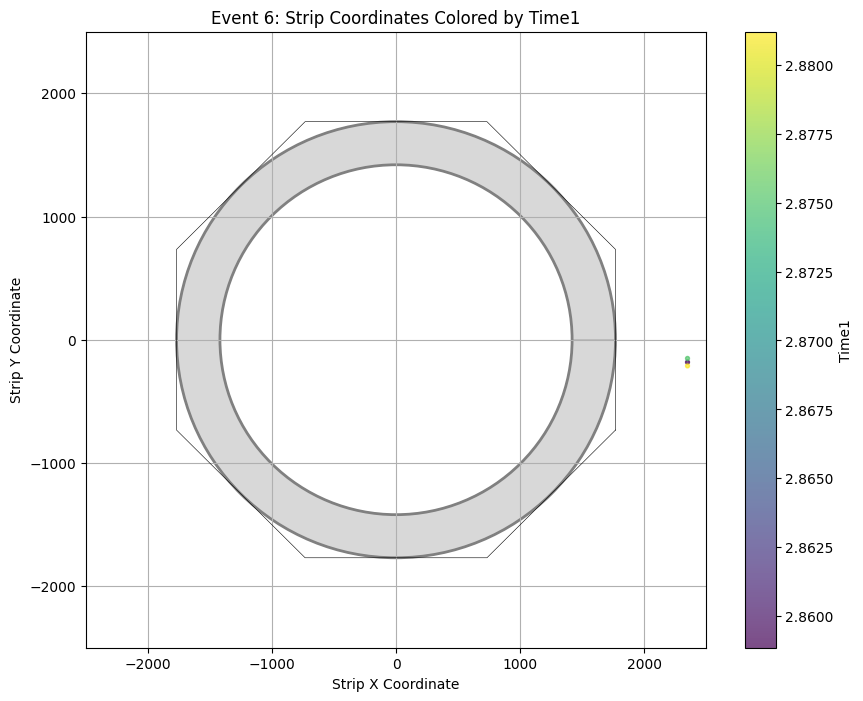

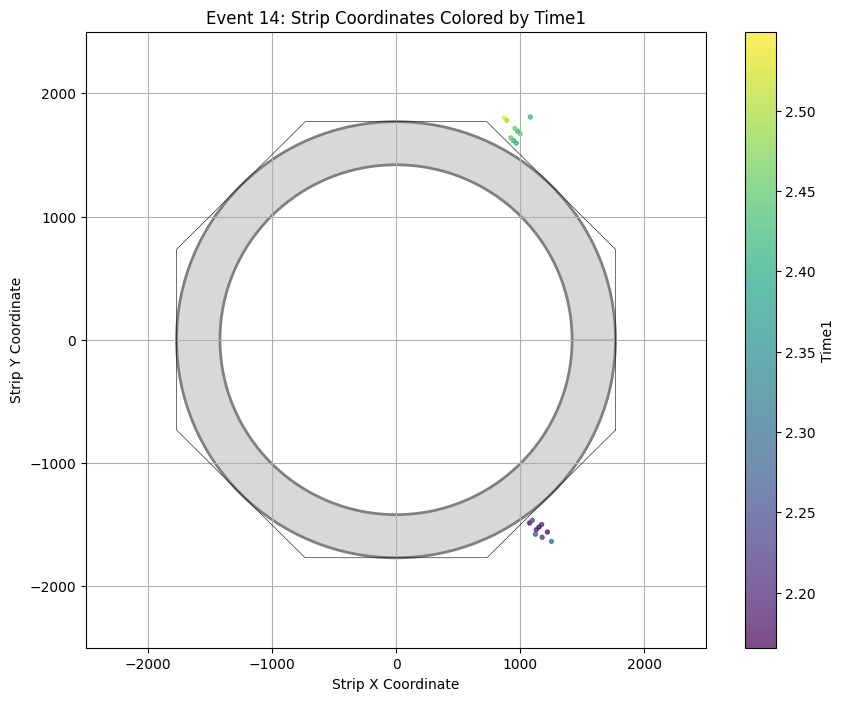

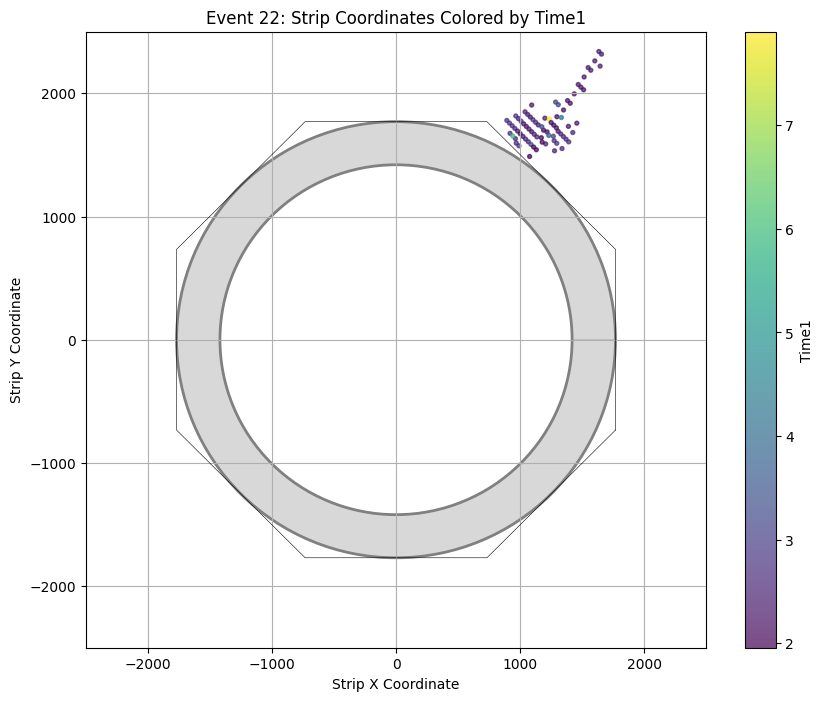

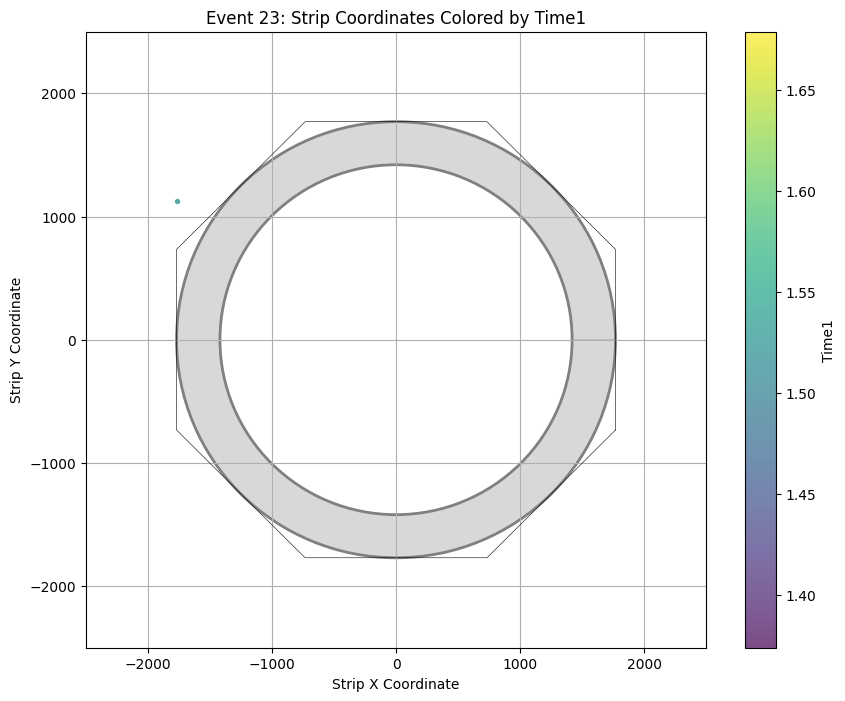

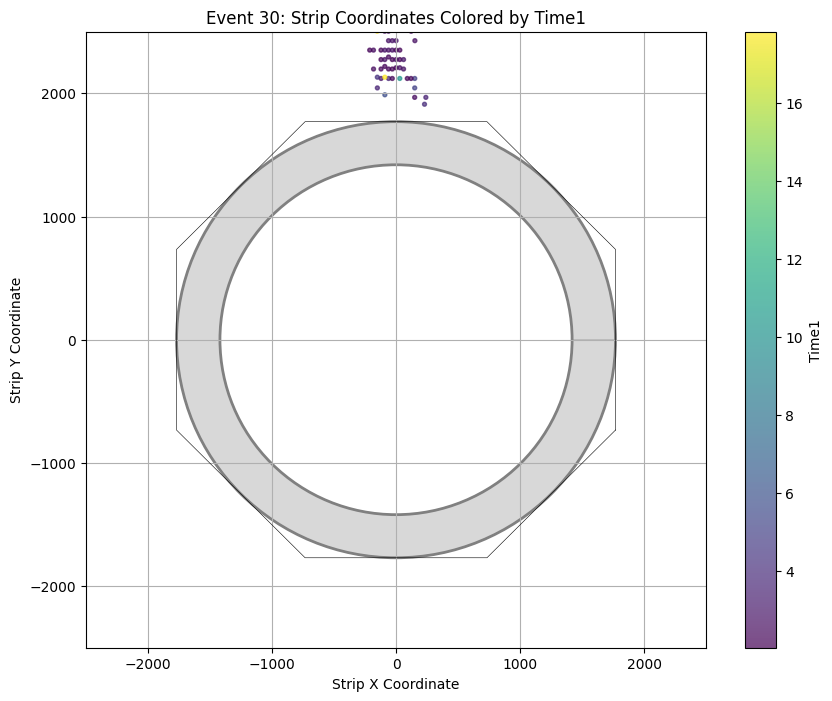

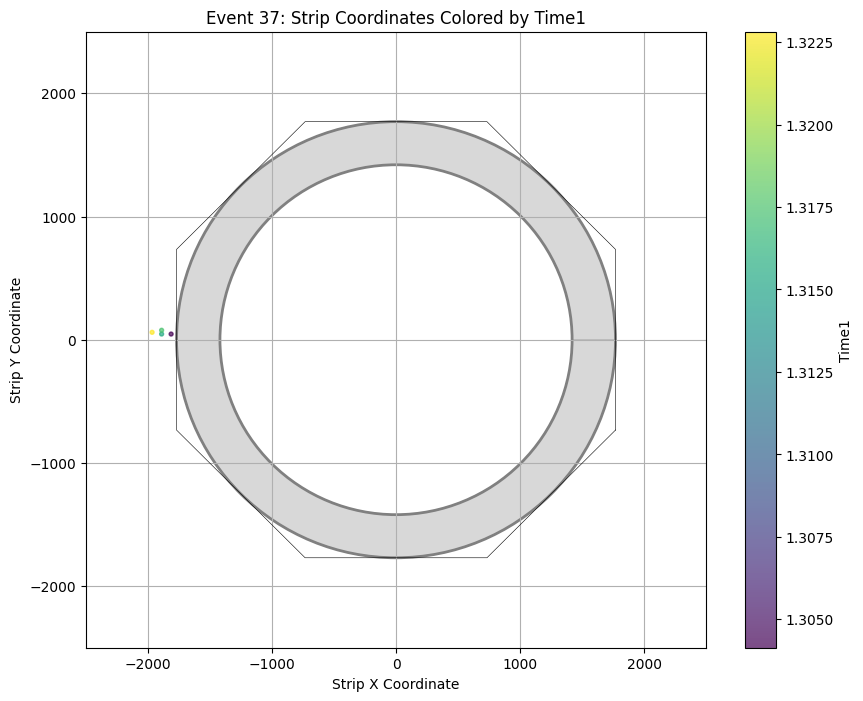

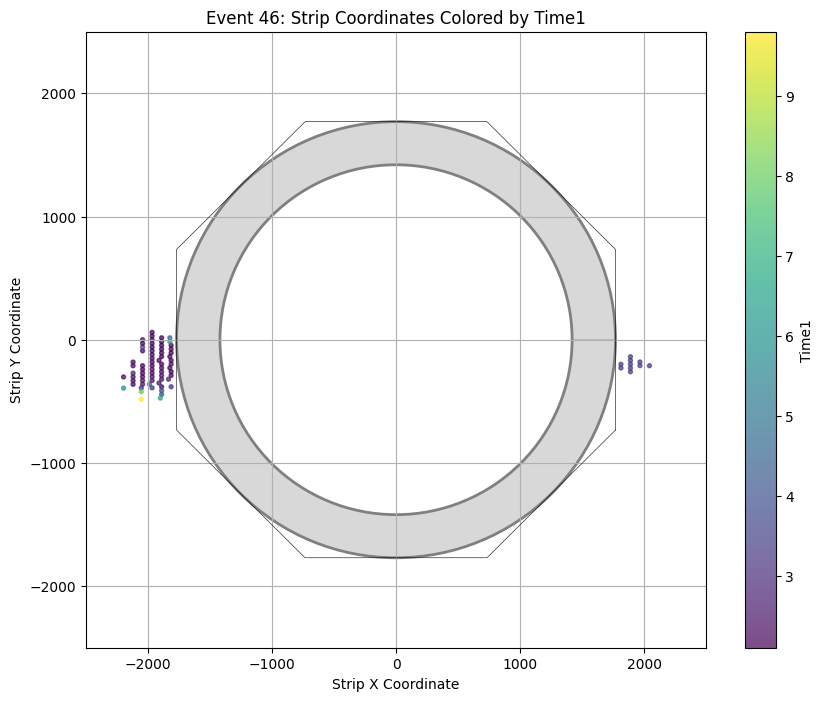

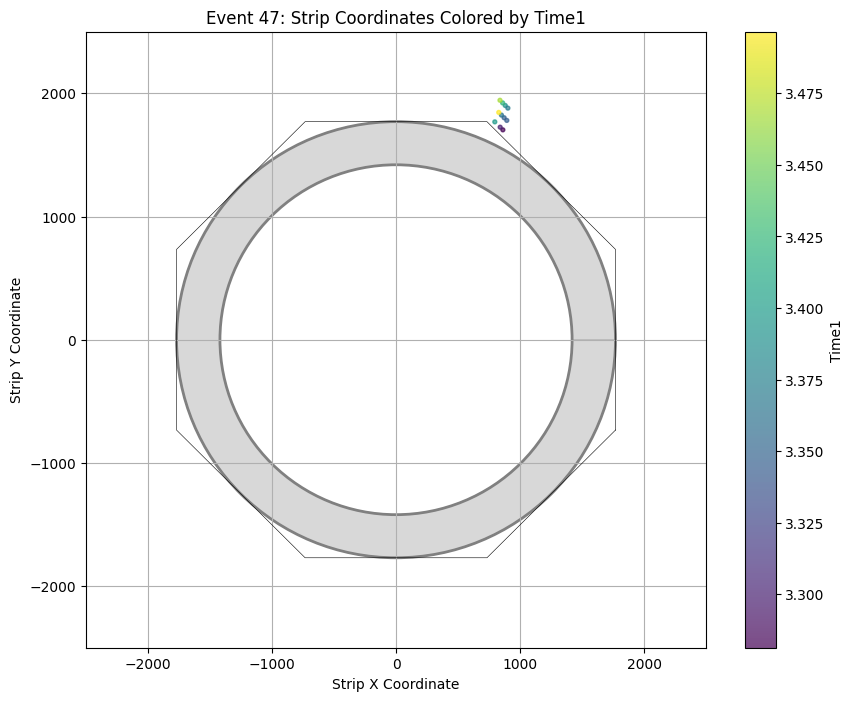

Created 8 scatter plots in the 'event_plots' directory.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.colors import LogNorm
import numpy as np

# Read the CSV file
curr_df = df_old
import os

# Get unique event indices
unique_events = curr_df['event_idx'].unique()

# Create a directory to save plots if it doesn't exist
# os.makedirs('event_plots', exist_ok=True)

# Create a plot for each unique event
for event in unique_events:
    # Filter data for the current event
    event_df = curr_df[curr_df['event_idx'] == event]
    
    # Create figure for this event
    plt.figure(figsize=(10, 8))
    
    # Calculate total time
#     total_time = event_df['Charge1'] + event_df['Charge2']
    total_time = np.maximum(event_df['Time1'], event_df['Time2'])
    
    # Create scatter plot
    scatter = plt.scatter(event_df['strip_x'] * 10, event_df['strip_y'] * 10, 
                          c=total_time, 
                          cmap='viridis',  
#                           norm=LogNorm(),
                          alpha=0.7,s = np.ones(len(total_time)) * 8)
    
    # Add colorbar
    plt.colorbar(scatter, label='Time1')
    
    # Set labels and title
    plt.xlabel('Strip X Coordinate')
    plt.ylabel('Strip Y Coordinate')
    plt.title(f'Event {event}: Strip Coordinates Colored by Time1')
    plt.grid(True)
    
    R = (1420 + 350)
    R_min = (1420)
    color = "black"
    outer_radius = R / np.cos(np.pi/8)
    angles = np.linspace(-np.pi/8, 2*np.pi-np.pi/8, 9)[:-1] 
    hex_x = outer_radius * np.cos(angles)
    hex_y = outer_radius * np.sin(angles)
    plt.plot(np.append(hex_x,hex_x[0]), np.append(hex_y, hex_y[0]), color=color, linewidth=0.4)
    
    #circle drawing
    theta = np.linspace(0, 2*np.pi, 100)

    # Create points for the outer and inner circles
    x_outer = R * np.cos(theta)
    y_outer = R * np.sin(theta)
    x_inner = R_min * np.cos(theta)
    y_inner = R_min * np.sin(theta)

    # Combine the points to create a closed path
    x = np.concatenate([x_outer, x_inner[::-1], [x_outer[0]]])
    y = np.concatenate([y_outer, y_inner[::-1], [y_outer[0]]])

    # Fill the region between circles
    plt.fill(x, y, alpha=0.3, color='gray', label='Solenoid')

    circle_out = Circle((0, 0), R, color="gray", fill=False, linewidth=2)
    circle_in = Circle((0, 0), R_min, color="gray", fill=False, linewidth=2)
    plt.gca().add_patch(circle_out)
    plt.gca().add_patch(circle_in)
#     plt.xlim(-3600,3600)
#     plt.ylim(-3600,3600)
    plt.xlim(-2500,2500)
    plt.ylim(-2500,2500)
    plt.show()
    
    # Save the plot
#     plt.savefig(f'event_plots/event_{event}_scatter.png')
    
    # Close the plot to free up memory
#     plt.close()

print(f"Created {len(unique_events)} scatter plots in the 'event_plots' directory.")